<a href="https://colab.research.google.com/github/kp0007/MSAI_kp35262/blob/main/Mimic_iii_visulizations_kp35262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Load All Necessary Python Packages***

In [3]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ***Load All Necessary Mimic - iii full Dataset Tables***

In [11]:
d1 = files.upload()
admissions = pd.read_csv('ADMISSIONS.csv')

Saving ADMISSIONS.csv to ADMISSIONS.csv


In [4]:
d2 = files.upload()
d_icd_diag = pd.read_csv('D_ICD_DIAGNOSES.csv')

Saving D_ICD_DIAGNOSES.csv to D_ICD_DIAGNOSES.csv


In [5]:
d3 = files.upload()
dig_icd = pd.read_csv('DIAGNOSES_ICD.csv')

Saving DIAGNOSES_ICD.csv to DIAGNOSES_ICD.csv


In [6]:
d4 = files.upload()
patients = pd.read_csv('PATIENTS.csv')

Saving PATIENTS.csv to PATIENTS.csv


In [4]:
d5 = files.upload()
presc = pd.read_csv('PRESCRIPTIONS.csv')

Saving PRESCRIPTIONS.csv to PRESCRIPTIONS.csv


<ipython-input-4-5f9449d846cd>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  presc = pd.read_csv('PRESCRIPTIONS.csv')


# ***Visulization - 1 - Distribution of Admission Types***

In [9]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [10]:
admissions.ADMISSION_TYPE.unique()

array(['EMERGENCY', 'ELECTIVE', 'NEWBORN', 'URGENT'], dtype=object)

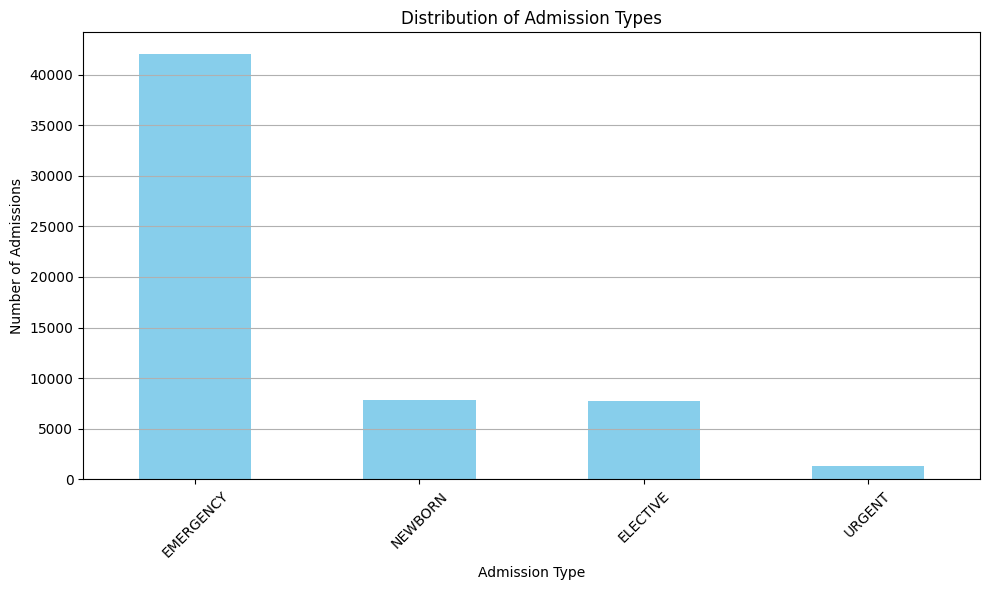

In [12]:
admission_type_counts = admissions['ADMISSION_TYPE'].value_counts()
plt.figure(figsize=(10, 6))
admission_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# ***Visulization - 2 - Top 10 Chronic Diseases***

In [14]:
chronic_icd9_codes = d_icd_diag[(d_icd_diag['SHORT_TITLE'].str.lower().str.contains("chronic")) | (d_icd_diag['LONG_TITLE'].str.lower().str.contains("chronic"))]['ICD9_CODE'].unique()
d_icd_diag[d_icd_diag['ICD9_CODE'].isin(chronic_icd9_codes)]

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
93,266,0061,Chr amebiasis w/o absces,Chronic intestinal amebiasis without mention o...
411,462,0982,Chr gc infect lower gu,"Gonococcal infection, chronic, of lower genito..."
412,463,09830,Chr gc upper gu NOS,Chronic gonococcal infection of upper genitour...
413,464,09831,"Gc cystitis, chronic","Gonococcal cystitis, chronic"
414,465,09832,"Gc prostatitis, chronic","Gonococcal prostatitis, chronic"
...,...,...,...,...
11042,13847,73017,Chr osteomyelit-ankle,"Chronic osteomyelitis, ankle and foot"
11043,13848,73018,Chr osteomyelit NEC,"Chronic osteomyelitis, other specified sites"
11044,13849,73019,Chr osteomyelit-mult,"Chronic osteomyelitis, multiple sites"
11759,12375,99762,Infection amputat stump,Infection (chronic) of amputation stump


In [15]:
chronic_diagnosis = dig_icd[dig_icd["ICD9_CODE"].isin(chronic_icd9_codes)]
chronic_diagnosis

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
11,1308,109,172335,12.0,28521
12,1309,109,172335,13.0,28529
...,...,...,...,...,...
650973,638481,97172,133092,5.0,42833
650976,638484,97172,133092,8.0,40390
650981,639737,97476,189690,6.0,33829
651006,639762,97488,161999,7.0,51883


In [16]:
chronic_diagnosis_count = chronic_diagnosis.groupby("ICD9_CODE")["SUBJECT_ID"].count().sort_values(ascending=False).head(10)
chronic_diagnosis_count

,SUBJECT_ID
ICD9_CODE,
496,4431
5859,3435
40390,3421
40391,2630
4168,2148
28521,1384
42832,1240
42833,1220
07054,1218


In [17]:
chronic_diagnosis_and_count = d_icd_diag.join(chronic_diagnosis_count,  on="ICD9_CODE").sort_values("SUBJECT_ID", ascending=False).head(10)
chronic_diagnosis_and_count

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE,SUBJECT_ID
5394,5123,496,Chr airway obstruct NEC,"Chronic airway obstruction, not elsewhere clas...",4431.0
5913,5915,5859,Chronic kidney dis NOS,"Chronic kidney disease, unspecified",3435.0
4314,4315,40390,Hy kid NOS w cr kid I-IV,"Hypertensive chronic kidney disease, unspecifi...",3421.0
4315,4316,40391,Hyp kid NOS w cr kid V,"Hypertensive chronic kidney disease, unspecifi...",2630.0
4397,4398,4168,Chr pulmon heart dis NEC,Other chronic pulmonary heart diseases,2148.0
3141,3142,28521,Anemia in chr kidney dis,Anemia in chronic kidney disease,1384.0
4480,4481,42832,Chr diastolic hrt fail,Chronic diastolic heart failure,1240.0
4481,4482,42833,Ac on chr diast hrt fail,Acute on chronic diastolic heart failure,1220.0
1323,1045,07054,Chrnc hpt C wo hpat coma,Chronic hepatitis C without mention of hepatic...,1218.0
5164,5545,49121,Obs chr bronc w(ac) exac,Obstructive chronic bronchitis with (acute) ex...,1198.0


<Figure size 2000x1200 with 0 Axes>

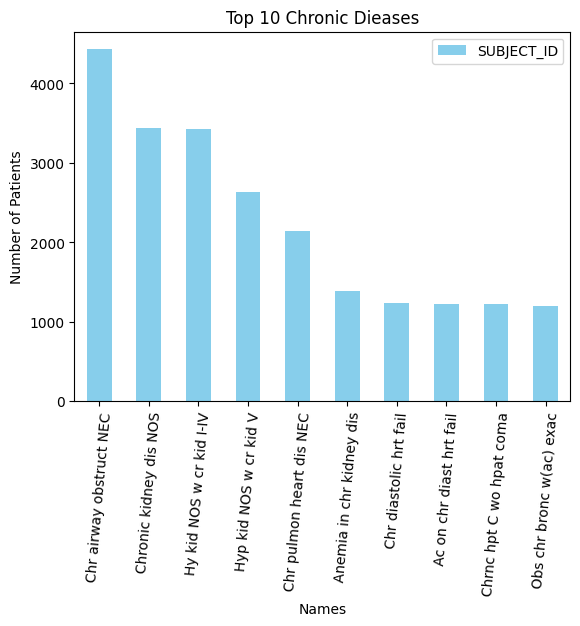

In [39]:
plt.figure(figsize=(20, 12))
chronic_diagnosis_and_count[["SHORT_TITLE", "SUBJECT_ID"]].set_index("SHORT_TITLE").plot(kind='bar', color='skyblue')
plt.title('Top 10 Chronic Dieases')
plt.xlabel('Names')
plt.ylabel('Number of Patients')
plt.xticks(rotation=85)

# Show the plot
plt.show()

# ***Visulization - 3 - Patient Status***

In [40]:
alive_count = patients['EXPIRE_FLAG'].value_counts()
print(alive_count)

EXPIRE_FLAG
0    30761
1    15759
Name: count, dtype: int64


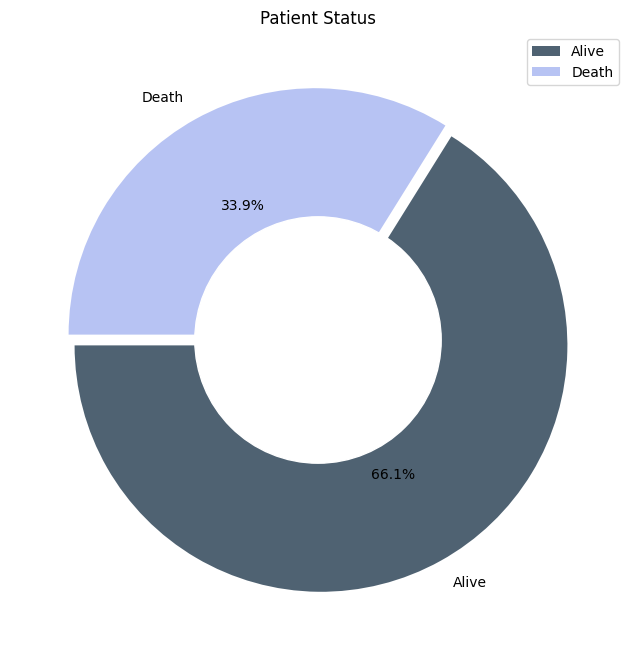

In [42]:
plt.figure(figsize=(12,8))
plt.title("Patient Status")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(alive_count, explode=(0.025,0.025),  labels=['Alive','Death'], colors=['#4F6272', '#B7C3F3'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

# ***Visulization - 4 - Insurance Distribution***

In [43]:
admissions_unique = admissions.drop_duplicates(subset=['SUBJECT_ID'])
admissions_unique['SUBJECT_ID'].value_counts()

,count
SUBJECT_ID,
22,1
31569,1
31572,1
31573,1
31574,1
...,...
18963,1
18964,1
18965,1


In [44]:
merg_pat_admi_unique = pd.merge(admissions_unique, patients, on='SUBJECT_ID')
merg_pat_admi_unique.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,BENZODIAZEPINE OVERDOSE,0,1,19,F,2131-05-07 00:00:00,NaN,NaN,NaN,0
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,20,M,2082-07-17 00:00:00,NaN,NaN,NaN,0
2,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,...,INTERIOR MYOCARDIAL INFARCTION,0,1,21,M,2100-05-31 00:00:00,NaN,NaN,NaN,0
3,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,ACUTE CORONARY SYNDROME,0,1,22,M,2101-11-21 00:00:00,NaN,NaN,NaN,0
4,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,V-TACH,0,1,23,M,2054-05-04 00:00:00,2128-02-25 00:00:00,NaN,2128-02-25 00:00:00,1


In [45]:
merg_pat_admi_unique['INSURANCE'].value_counts()

,count
INSURANCE,
Medicare,20446
Private,19518
Medicaid,4424
Government,1546
Self Pay,586


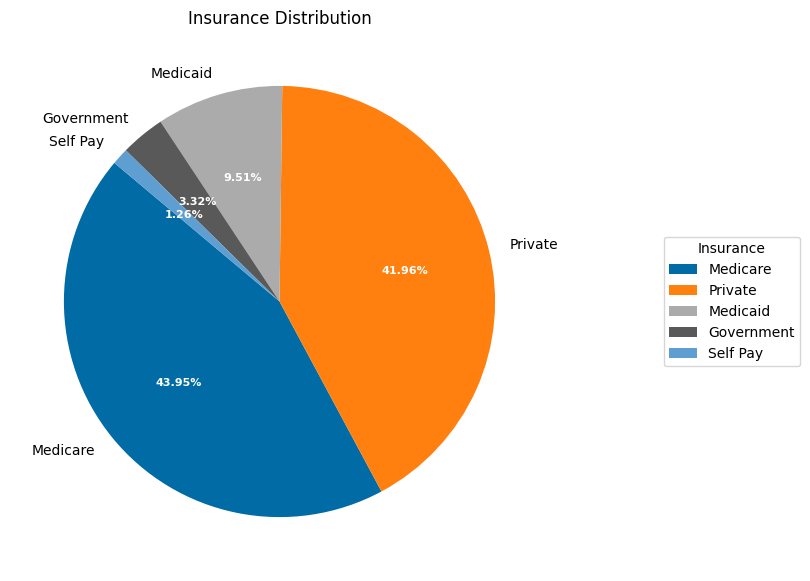

In [49]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(15, 7), subplot_kw=dict(aspect="equal"))
sizes = merg_pat_admi_unique['INSURANCE'].value_counts()
wedges, texts, autotexts = ax.pie(sizes, labels=sizes.index, autopct='%1.2f%%', startangle=140)

for autotext in autotexts: autotext.set_color('white')
ax.legend(wedges, sizes.index,
          title="Insurance",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Insurance Distribution")
plt.show()

# ***Visulization - 5 - Top 10 Most Prescribed Drugs***

In [6]:
top_10_drugs =  presc['DRUG'].value_counts().head(10)
print(top_10_drugs)

DRUG
Potassium Chloride             192993
Insulin                        143465
D5W                            142241
Furosemide                     133122
0.9% Sodium Chloride           130147
NS                             129731
Magnesium Sulfate               90427
Iso-Osmotic Dextrose            87005
Sodium Chloride 0.9%  Flush     83392
Acetaminophen                   78768
Name: count, dtype: int64


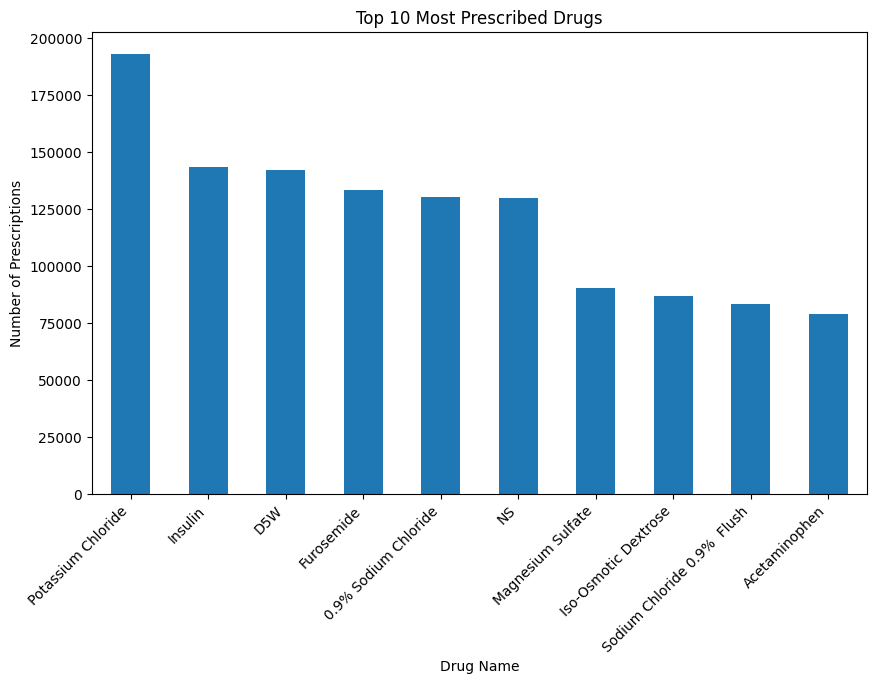

In [8]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
top_10_drugs.plot(kind='bar')
plt.title('Top 10 Most Prescribed Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Number of Prescriptions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  # Adjust layout to prevent labels from overlapping
plt.show()